# Word2Vec

Let's work on skipgram-based implementation of word2vec.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## 1. Define some very simple data for understanding

In [2]:
import nltk
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
corpus = brown.sents(categories='news')

In [4]:
print("List in 'news' category:")
print(len(corpus))

List in 'news' category:
4623


In [5]:
corpus = [sent for sent in corpus if len(sent) > 2]
corpus

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.'],
 ['The',
  'jury',
  'further',
  'said',
  'in',
  'term-end',
  'presentments',
  'that',
  'the',
  'City',
  'Executive',
  'Committee',
  ',',
  'which',
  'had',
  'over-all',
  'charge',
  'of',
  'the',
  'election',
  ',',
  '``',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'City',
  'of',
  'Atlanta',
  "''",
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted',
  '.'],
 ['The',
  'September-October',
  'term',
  'jury',
  'had',
  'been',
  'charged',
  'by',
  'Fulton',
  'Superior',
  'Court',
  'Judge',
  'Durwood',
  'Pye',
  'to',
  'investigate',
  'reports',
  'of',
  'possible',
  '``',
  'irregularities',
  "''",
 

In [6]:
print("List in 'news' category:")
print(len(corpus))

List in 'news' category:
4504


In [7]:
#get word sequences and unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(corpus)))
vocab

['seats',
 'words',
 'Norway',
 'pads',
 'Simpson',
 'Electra',
 'survive',
 'restrict',
 'worded',
 'plus',
 '350',
 'mayor',
 'Total',
 'Dunn',
 'perhaps',
 '1.10.8',
 '1900',
 'flu',
 'weapons',
 'lover',
 'reservoir',
 'tease',
 'Vice',
 'Dow',
 'enlarged',
 'performance',
 'buddies',
 'order',
 'Twist',
 'capabilities',
 'McIntyre',
 'Buchheister',
 'moist',
 'overcome',
 '38-point',
 'FFA',
 'Register',
 'Green',
 'slow-bouncing',
 'dean',
 'excessive',
 'bites',
 'chemicals',
 'specifically',
 'Ala.',
 'someone',
 'operated',
 'Bucharest',
 'stepping',
 'Okla.',
 'Smythe',
 'agonizing',
 'unanimously',
 "Philadelphia's",
 'Bay-front',
 'hold',
 '14-term',
 'intersection',
 'Michigan',
 'pollution',
 'health',
 'Republican',
 'Wendell',
 'artistic',
 'Wick',
 'believes',
 're-set',
 "Here's",
 'complete',
 '750',
 'creating',
 'bridge',
 'adjoining',
 'acres',
 'Fresh',
 'preserving',
 'recession',
 'attacked',
 'Afterwards',
 'Horace',
 'nolo',
 'requests',
 'Faced',
 'loosely',

In [8]:
#numericalization
word2index = {w: i for i, w in enumerate(vocab)}
print(word2index)

{'seats': 0, 'words': 1, 'Norway': 2, 'pads': 3, 'Simpson': 4, 'Electra': 5, 'survive': 6, 'restrict': 7, 'worded': 8, 'plus': 9, '350': 10, 'mayor': 11, 'Total': 12, 'Dunn': 13, 'perhaps': 14, '1.10.8': 15, '1900': 16, 'flu': 17, 'weapons': 18, 'lover': 19, 'reservoir': 20, 'tease': 21, 'Vice': 22, 'Dow': 23, 'enlarged': 24, 'performance': 25, 'buddies': 26, 'order': 27, 'Twist': 28, 'capabilities': 29, 'McIntyre': 30, 'Buchheister': 31, 'moist': 32, 'overcome': 33, '38-point': 34, 'FFA': 35, 'Register': 36, 'Green': 37, 'slow-bouncing': 38, 'dean': 39, 'excessive': 40, 'bites': 41, 'chemicals': 42, 'specifically': 43, 'Ala.': 44, 'someone': 45, 'operated': 46, 'Bucharest': 47, 'stepping': 48, 'Okla.': 49, 'Smythe': 50, 'agonizing': 51, 'unanimously': 52, "Philadelphia's": 53, 'Bay-front': 54, 'hold': 55, '14-term': 56, 'intersection': 57, 'Michigan': 58, 'pollution': 59, 'health': 60, 'Republican': 61, 'Wendell': 62, 'artistic': 63, 'Wick': 64, 'believes': 65, 're-set': 66, "Here's":

In [9]:
#vocab size
voc_size = len(vocab)
print(voc_size)

14326


In [10]:
#append UNK
vocab.append('<UNK>')

In [11]:
vocab

['seats',
 'words',
 'Norway',
 'pads',
 'Simpson',
 'Electra',
 'survive',
 'restrict',
 'worded',
 'plus',
 '350',
 'mayor',
 'Total',
 'Dunn',
 'perhaps',
 '1.10.8',
 '1900',
 'flu',
 'weapons',
 'lover',
 'reservoir',
 'tease',
 'Vice',
 'Dow',
 'enlarged',
 'performance',
 'buddies',
 'order',
 'Twist',
 'capabilities',
 'McIntyre',
 'Buchheister',
 'moist',
 'overcome',
 '38-point',
 'FFA',
 'Register',
 'Green',
 'slow-bouncing',
 'dean',
 'excessive',
 'bites',
 'chemicals',
 'specifically',
 'Ala.',
 'someone',
 'operated',
 'Bucharest',
 'stepping',
 'Okla.',
 'Smythe',
 'agonizing',
 'unanimously',
 "Philadelphia's",
 'Bay-front',
 'hold',
 '14-term',
 'intersection',
 'Michigan',
 'pollution',
 'health',
 'Republican',
 'Wendell',
 'artistic',
 'Wick',
 'believes',
 're-set',
 "Here's",
 'complete',
 '750',
 'creating',
 'bridge',
 'adjoining',
 'acres',
 'Fresh',
 'preserving',
 'recession',
 'attacked',
 'Afterwards',
 'Horace',
 'nolo',
 'requests',
 'Faced',
 'loosely',

In [12]:
word2index['<UNK>'] = 0

In [13]:
#just in case we need to use
index2word = {v:k for k, v in word2index.items()} 

In [14]:
index2word

{0: '<UNK>',
 1: 'words',
 2: 'Norway',
 3: 'pads',
 4: 'Simpson',
 5: 'Electra',
 6: 'survive',
 7: 'restrict',
 8: 'worded',
 9: 'plus',
 10: '350',
 11: 'mayor',
 12: 'Total',
 13: 'Dunn',
 14: 'perhaps',
 15: '1.10.8',
 16: '1900',
 17: 'flu',
 18: 'weapons',
 19: 'lover',
 20: 'reservoir',
 21: 'tease',
 22: 'Vice',
 23: 'Dow',
 24: 'enlarged',
 25: 'performance',
 26: 'buddies',
 27: 'order',
 28: 'Twist',
 29: 'capabilities',
 30: 'McIntyre',
 31: 'Buchheister',
 32: 'moist',
 33: 'overcome',
 34: '38-point',
 35: 'FFA',
 36: 'Register',
 37: 'Green',
 38: 'slow-bouncing',
 39: 'dean',
 40: 'excessive',
 41: 'bites',
 42: 'chemicals',
 43: 'specifically',
 44: 'Ala.',
 45: 'someone',
 46: 'operated',
 47: 'Bucharest',
 48: 'stepping',
 49: 'Okla.',
 50: 'Smythe',
 51: 'agonizing',
 52: 'unanimously',
 53: "Philadelphia's",
 54: 'Bay-front',
 55: 'hold',
 56: '14-term',
 57: 'intersection',
 58: 'Michigan',
 59: 'pollution',
 60: 'health',
 61: 'Republican',
 62: 'Wendell',
 63: 

## 2. Prepare train data

In [15]:
for c in corpus:
    print(c)

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']
['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.']
['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'reports

In [16]:
def random_batch(batch_size, corpus, window_size=2):
    
    # Make skip gram of one size window
    skip_grams = []
    # loop each word sequence
    # we starts from 1 because 0 has no context
    # we stop at second last for the same reason
    for sent in corpus:
        if len(sent) > 2 * window_size:
                
            for i in range(window_size, len(sent) - window_size):
                target = word2index[sent[i]]
                
                for j in range(-window_size, window_size+1):
                    if j!=0:
                        outside = word2index[sent[i+j]]
                        skip_grams.append([target, outside])
    
    # print(f"Generated {len(skip_grams)} skip-grams with window size {window_size}")

    if len(skip_grams) == 0:
        raise ValueError("No skip-grams generated. Check the corpus and window size")

    
     # Randomly sample a batch of skip-grams
    random_indices = np.random.choice(len(skip_grams), batch_size, replace=False)
    inputs = np.array([skip_grams[i][0] for i in random_indices])
    labels = np.array([skip_grams[i][1] for i in random_indices])
            
    return inputs.reshape(-1, 1), labels.reshape(-1, 1)

### Testing the method

In [17]:
#testing the method
batch_size = 10 # mini-batch size
input_batch, target_batch = random_batch(4, corpus, 4)

print("Input: ", input_batch)
print("Target: ", target_batch)


Input:  [[14127]
 [ 2710]
 [10992]
 [  100]]
Target:  [[ 4358]
 [ 3888]
 [ 9507]
 [14127]]


In [18]:
corpus

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.'],
 ['The',
  'jury',
  'further',
  'said',
  'in',
  'term-end',
  'presentments',
  'that',
  'the',
  'City',
  'Executive',
  'Committee',
  ',',
  'which',
  'had',
  'over-all',
  'charge',
  'of',
  'the',
  'election',
  ',',
  '``',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'City',
  'of',
  'Atlanta',
  "''",
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted',
  '.'],
 ['The',
  'September-October',
  'term',
  'jury',
  'had',
  'been',
  'charged',
  'by',
  'Fulton',
  'Superior',
  'Court',
  'Judge',
  'Durwood',
  'Pye',
  'to',
  'investigate',
  'reports',
  'of',
  'possible',
  '``',
  'irregularities',
  "''",
 

## 3. Model

$$J(\theta) = -\frac{1}{T}\sum_{t=1}^{T}\sum_{\substack{-m \leq j \leq m \\ j \neq 0}}\log P(w_{t+j} | w_t; \theta)$$

where $P(w_{t+j} | w_t; \theta) = $

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

where $o$ is the outside words and $c$ is the center word

In [19]:
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size)
        self.embedding_u = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        all_embeds    = self.embedding_u(all_vocabs) #   [batch_size, voc_size, emb_size]
        
        scores      = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, voc_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, voc_size, 1] = [batch_size, voc_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)    
            
        return nll # negative log likelihood

## 4. Training

In [22]:
batch_size     = 128 # mini-batch size
embedding_size = 2 #so we can later plot
model          = Skipgram(voc_size, embedding_size)

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

#use for the normalized term in the probability calculation
all_vocabs = prepare_sequence(list(vocab), word2index).expand(batch_size, len(vocab))  # [batch_size, voc_size]
all_vocabs.shape

torch.Size([128, 14327])

In [24]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [25]:
import time

# Training
num_epochs = 50
batch_size = 128
window_sizes = [2,4,6]

for window_size in window_sizes:
    print(f"Training model with window size: {window_size}\n")    
    for epoch in range(num_epochs):
        
        start = time.time()
        
        input_batch, target_batch = random_batch(batch_size, corpus, window_size)
        input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
        target_batch = torch.LongTensor(target_batch) #[batch_size, 1]


        optimizer.zero_grad()
        loss= model(input_batch, target_batch, all_vocabs)
        
        loss.backward()
        optimizer.step()
        
        end = time.time()
        
        epoch_mins, epoch_secs = epoch_time(start, end)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch: {epoch + 1} | loss: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")


Training model with window size: 2

Epoch: 10 | loss: 10.515301 | time: 0m 0s
Epoch: 20 | loss: 10.502695 | time: 0m 0s
Epoch: 30 | loss: 10.659781 | time: 0m 0s
Epoch: 40 | loss: 10.522581 | time: 0m 0s
Epoch: 50 | loss: 10.507303 | time: 0m 0s
Training model with window size: 4

Epoch: 10 | loss: 10.251258 | time: 0m 0s
Epoch: 20 | loss: 10.340159 | time: 0m 0s
Epoch: 30 | loss: 10.595272 | time: 0m 0s
Epoch: 40 | loss: 10.259119 | time: 0m 1s
Epoch: 50 | loss: 10.392205 | time: 0m 0s
Training model with window size: 6

Epoch: 10 | loss: 10.568904 | time: 0m 1s
Epoch: 20 | loss: 10.430597 | time: 0m 0s
Epoch: 30 | loss: 10.340755 | time: 0m 1s
Epoch: 40 | loss: 10.151964 | time: 0m 1s
Epoch: 50 | loss: 10.386613 | time: 0m 1s


## 5. Plotting the embeddings

In [26]:
#list of vocabs
vocab[:10]

['seats',
 'words',
 'Norway',
 'pads',
 'Simpson',
 'Electra',
 'survive',
 'restrict',
 'worded',
 'plus']

In [27]:
word = vocab[0]

In [28]:
#numericalization
id = word2index[word]
id

0

In [29]:
id_tensor = torch.LongTensor([id])
id_tensor

tensor([0])

In [30]:
#get the embedding by averaging
v_embed = model.embedding_v(id_tensor)
u_embed = model.embedding_u(id_tensor)

v_embed, u_embed

(tensor([[-1.0939, -2.5719]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.4945,  0.2034]], grad_fn=<EmbeddingBackward0>))

In [31]:
#average to get the word embedding
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(-1.1843, grad_fn=<SelectBackward0>)

In [32]:
#let's write a function to get embedding given a word
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

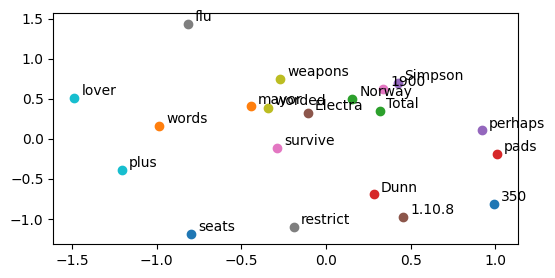

In [33]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## 6. Cosine similarity

Formally the [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) $s$ between two vectors $p$ and $q$ is defined as:

$$s = \frac{p \cdot q}{||p|| ||q||}, \textrm{ where } s \in [-1, 1] $$ 

If $p$ and $q$ is super similar, the result is 1 otherwise 0.

In [34]:
vocab

['seats',
 'words',
 'Norway',
 'pads',
 'Simpson',
 'Electra',
 'survive',
 'restrict',
 'worded',
 'plus',
 '350',
 'mayor',
 'Total',
 'Dunn',
 'perhaps',
 '1.10.8',
 '1900',
 'flu',
 'weapons',
 'lover',
 'reservoir',
 'tease',
 'Vice',
 'Dow',
 'enlarged',
 'performance',
 'buddies',
 'order',
 'Twist',
 'capabilities',
 'McIntyre',
 'Buchheister',
 'moist',
 'overcome',
 '38-point',
 'FFA',
 'Register',
 'Green',
 'slow-bouncing',
 'dean',
 'excessive',
 'bites',
 'chemicals',
 'specifically',
 'Ala.',
 'someone',
 'operated',
 'Bucharest',
 'stepping',
 'Okla.',
 'Smythe',
 'agonizing',
 'unanimously',
 "Philadelphia's",
 'Bay-front',
 'hold',
 '14-term',
 'intersection',
 'Michigan',
 'pollution',
 'health',
 'Republican',
 'Wendell',
 'artistic',
 'Wick',
 'believes',
 're-set',
 "Here's",
 'complete',
 '750',
 'creating',
 'bridge',
 'adjoining',
 'acres',
 'Fresh',
 'preserving',
 'recession',
 'attacked',
 'Afterwards',
 'Horace',
 'nolo',
 'requests',
 'Faced',
 'loosely',

In [35]:
#let's try similarity between first and second, and second and third
rough          = get_embed('rough')
fraud        = get_embed('fraud')
Pakistanis       = get_embed('Pakistanis')

In [36]:
#numpy version
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim
    
print(f"Pakistanis vs. fraud: ",        cos_sim(Pakistanis, fraud))
print(f"Pakistanis vs. rough: ",       cos_sim(Pakistanis, rough))
print(f"Pakistanis vs. Pakistanis: ",          cos_sim(Pakistanis, Pakistanis))

Pakistanis vs. fraud:  0.37681189883857263
Pakistanis vs. rough:  -0.9716730476517971
Pakistanis vs. Pakistanis:  1.0


In [37]:
#scipy version
from scipy import spatial

def cos_sim(a, b):
    cos_sim = 1 - spatial.distance.cosine(a, b)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim

print(f"Pakistanis vs. fraud: ",        cos_sim(Pakistanis, fraud))
print(f"Pakistanis vs. rough: ",       cos_sim(Pakistanis, rough))
print(f"Pakistanis vs. Pakistanis: ",          cos_sim(Pakistanis, Pakistanis))

Pakistanis vs. fraud:  0.3768118988385727
Pakistanis vs. rough:  -0.9716730476517972
Pakistanis vs. Pakistanis:  1.0
